In [35]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [36]:
df = pd.read_csv('/Users/uyashjha1710/Desktop/Code/House_price_predictioin_App/notebook/data/cleaned_bhp.csv')

In [37]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [38]:
X = df.drop(columns=['price'],axis=1)

In [39]:
y = df['price']

In [40]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [41]:
X = preprocessor.fit_transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((10560, 276), (2640, 276))

In [43]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [44]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 109.8404
- Mean Absolute Error: 41.7622
- R2 Score: 0.4839
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 88.4047
- Mean Absolute Error: 41.3820
- R2 Score: 0.5597


Lasso
Model performance for Training set
- Root Mean Squared Error: 117.4905
- Mean Absolute Error: 43.1155
- R2 Score: 0.4095
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 94.6173
- Mean Absolute Error: 42.2012
- R2 Score: 0.4957


Ridge
Model performance for Training set
- Root Mean Squared Error: 109.9051
- Mean Absolute Error: 41.5462
- R2 Score: 0.4833
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 88.1971
- Mean Absolute Error: 41.1087
- R2 Score: 0.5618


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 78.3515
- Mean Absolute Error: 22.4603
- R2 Score: 0.7374
------

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.984831
7,CatBoosting Regressor,0.975770
6,XGBRegressor,0.969567
4,Decision Tree,0.969165
3,K-Neighbors Regressor,0.631870
2,Ridge,0.561809
0,Linear Regression,0.559744
1,Lasso,0.495692
8,AdaBoost Regressor,0.331188


In [46]:
rm_model = RandomForestRegressor()
rm_model = rm_model.fit(X_train, y_train)
y_pred = rm_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.63


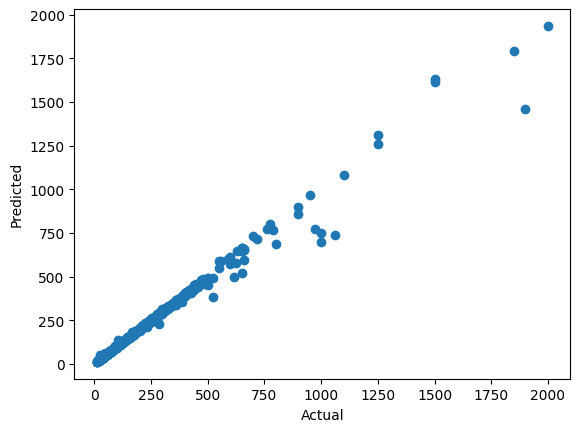

In [47]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

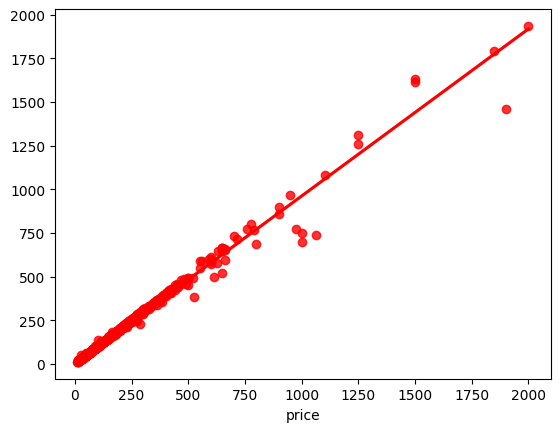

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
4111,80.0,80.0032,-0.0032
10607,75.0,80.8300,-5.8300
7372,61.0,60.9956,0.0044
11786,62.0,61.9412,0.0588
12227,56.5,56.4830,0.0170
...,...,...,...
2543,48.5,48.5741,-0.0741
96,65.0,65.0000,0.0000
2474,37.7,37.6434,0.0566
2522,250.0,252.6200,-2.6200
